# Visualizations

In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pl.read_csv("./../data/cleaned_penguin.csv",try_parse_dates=True)

In [3]:
# Custom palettes
sex_palette = {"Male": "#AEC6CF", "Female": "#FFB6C1"}   # pastel blue & pink
island_palette = {
    "Torgersen": "#A1C3D1",   # pastel teal-blue
    "Biscoe":    "#FFDAC1",   # peach-pastel
    "Dream":     "#B5EAD7"    # mint pastel
}

species_palette = {
    "Adelie": "#FDFD96",   # pastel yellow
    "Chinstrap": "#FFB347",      # pastel orange
    "Gentoo": "#B39EB5"        # pastel purple/gray
}

sns.set_style("whitegrid")


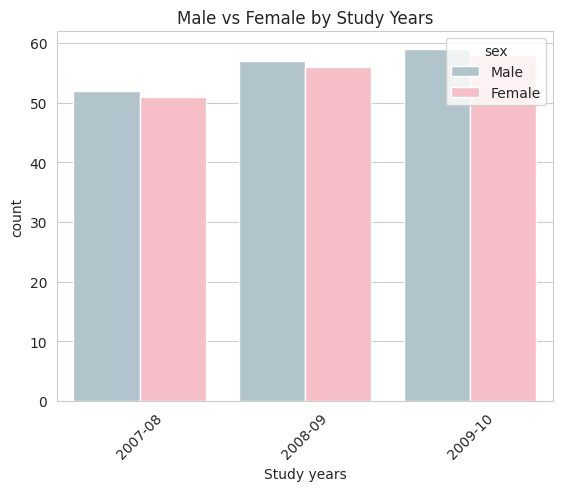

In [4]:
# --- Male vs Female by Study Years ---
sns.countplot(data=df.to_pandas(), x="Study years", hue="sex", palette=sex_palette)
plt.title("Male vs Female by Study Years")
plt.xticks(rotation=45)
plt.show()

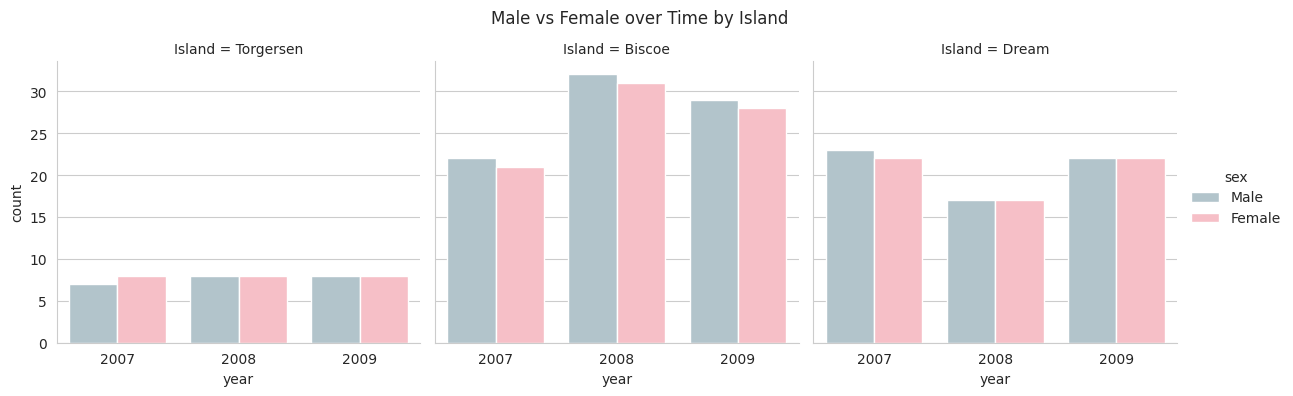

In [5]:
# --- Male vs Female over Time by Island---

sns.catplot(
    data=df.to_pandas(),
    x="year", hue="sex", palette=sex_palette, col="Island",
    kind="count", col_wrap=3, height=4
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Male vs Female over Time by Island")
plt.show()


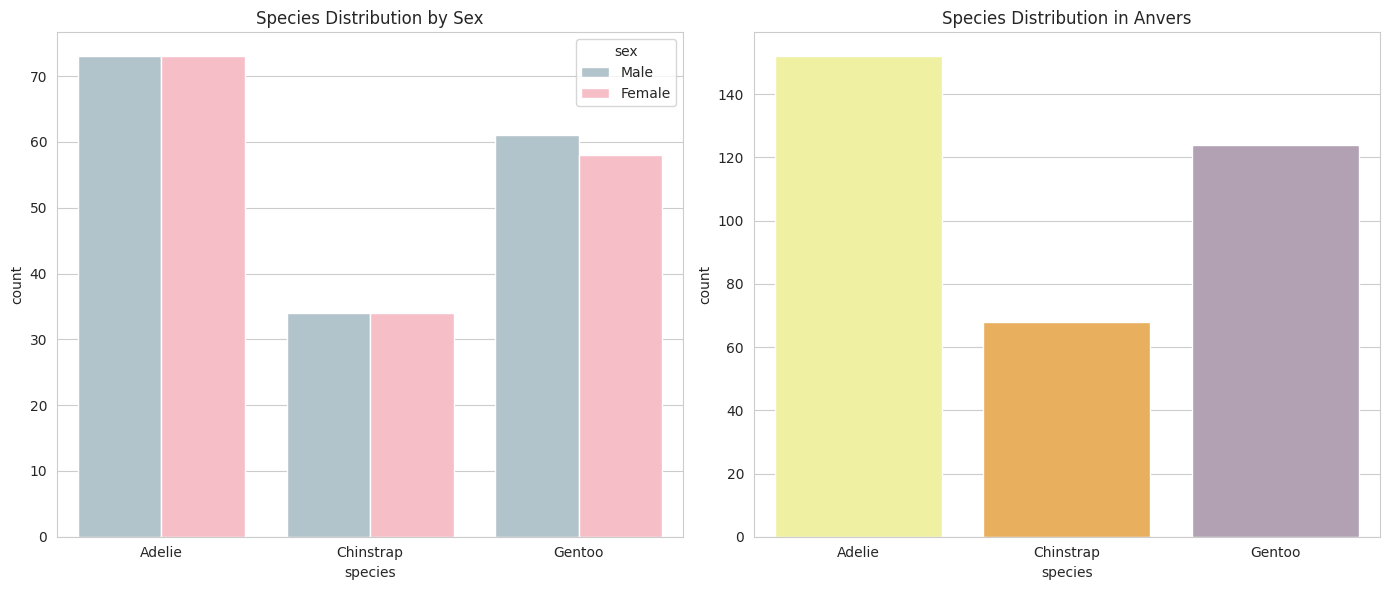

In [6]:
# --- Species Distribution in Anvers Region ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot with sex hue
sns.countplot(data=df.to_pandas(), x="species", hue="sex", palette=sex_palette, ax=axes[0])
axes[0].set_title("Species Distribution by Sex")

# Countplot with species hue
sns.countplot(data=df.to_pandas(), x="species", hue="species", palette=species_palette, ax=axes[1])
axes[1].set_title("Species Distribution in Anvers")

plt.tight_layout()
plt.show()


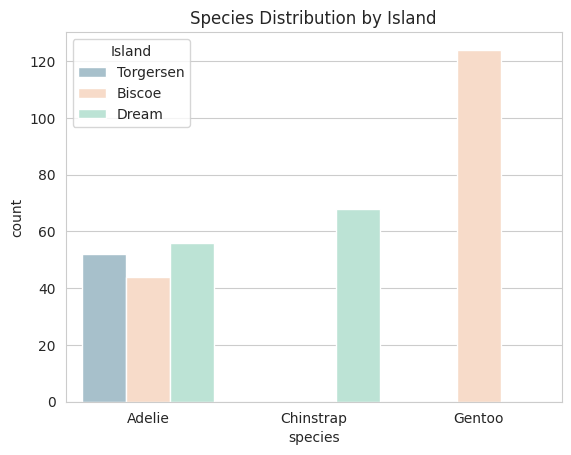

In [7]:
# --- Species Distribution by Island ---

sns.countplot(data=df.to_pandas(), x="species", hue="Island", palette= island_palette)
plt.title("Species Distribution by Island")
plt.show()

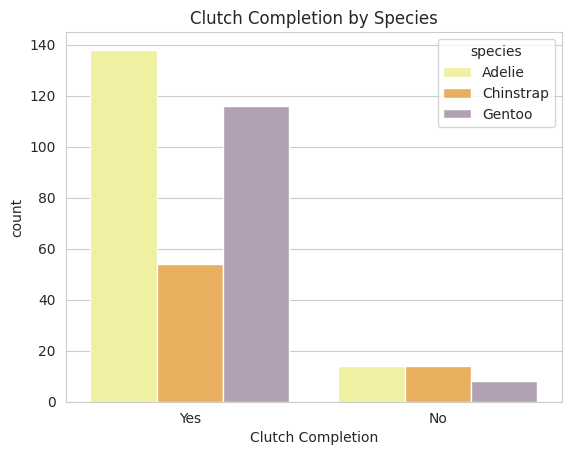

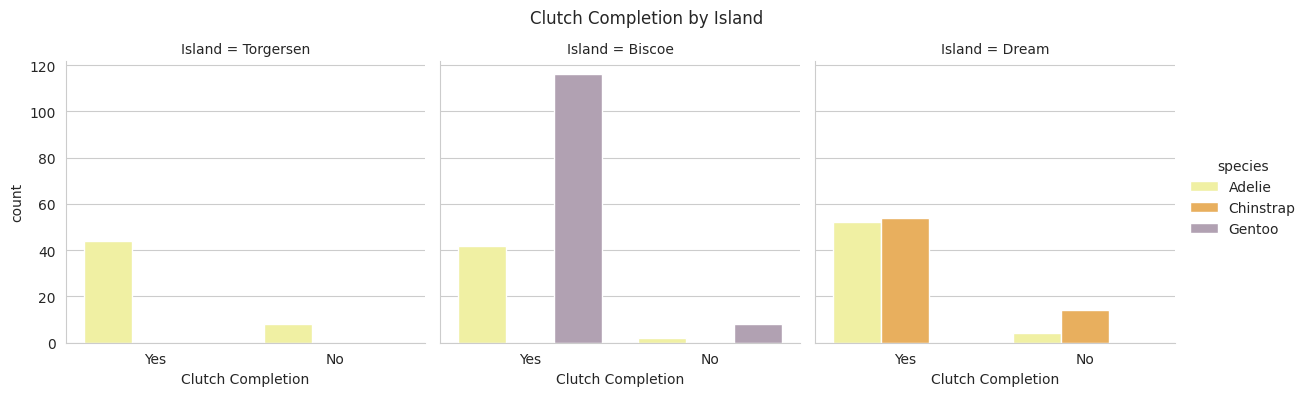

In [8]:
# --- Clutch Completion by Species and Island ---

sns.countplot(data=df.to_pandas(), x="Clutch Completion", hue="species", palette = species_palette)
plt.title("Clutch Completion by Species")
plt.show()

sns.catplot(
    data=df.to_pandas(),
    x="Clutch Completion", hue="species", palette = species_palette, col="Island",
    kind="count", col_wrap=3, height=4
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Clutch Completion by Island")
plt.show()


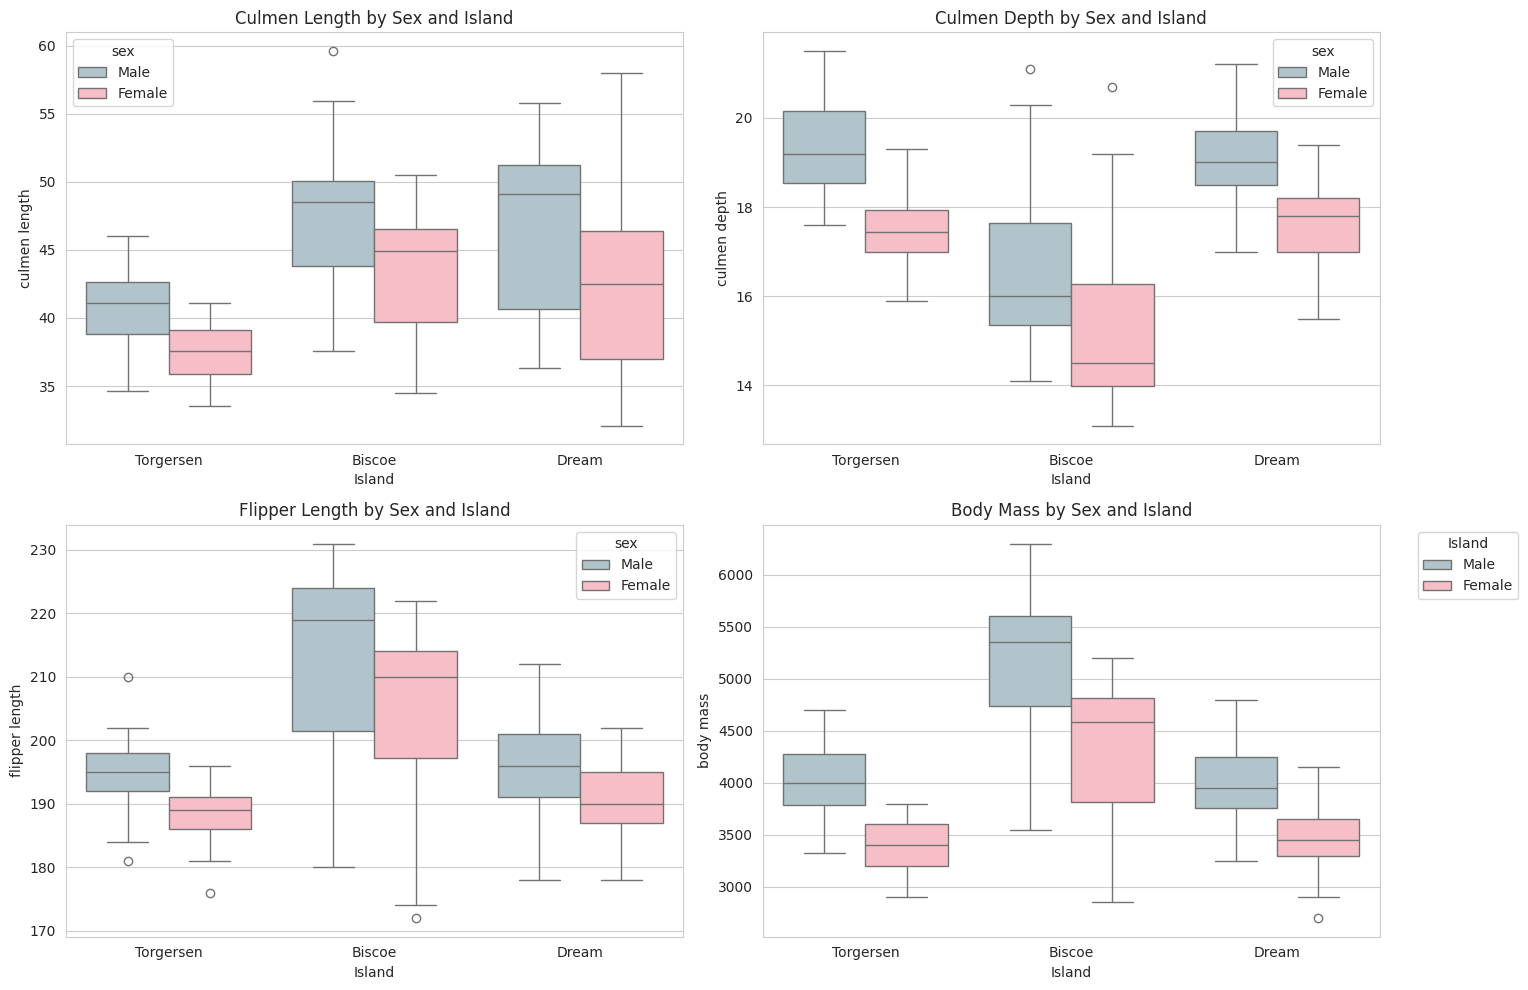

In [9]:
# -- body metrics of different islands by Gender ---

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = [
    ("culmen length", "Culmen Length"),
    ("culmen depth", "Culmen Depth"),
    ("flipper length", "Flipper Length"),
    ("body mass", "Body Mass")
]

for ax, (col, title) in zip(axes.flatten(), metrics):
    sns.boxplot(
        data=df.to_pandas(),
        x="Island",
        y=col,
        hue="sex", palette=sex_palette,    
        ax=ax
    )
    ax.set_title(f"{title} by Sex and Island")

plt.tight_layout()
plt.legend(title="Island", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

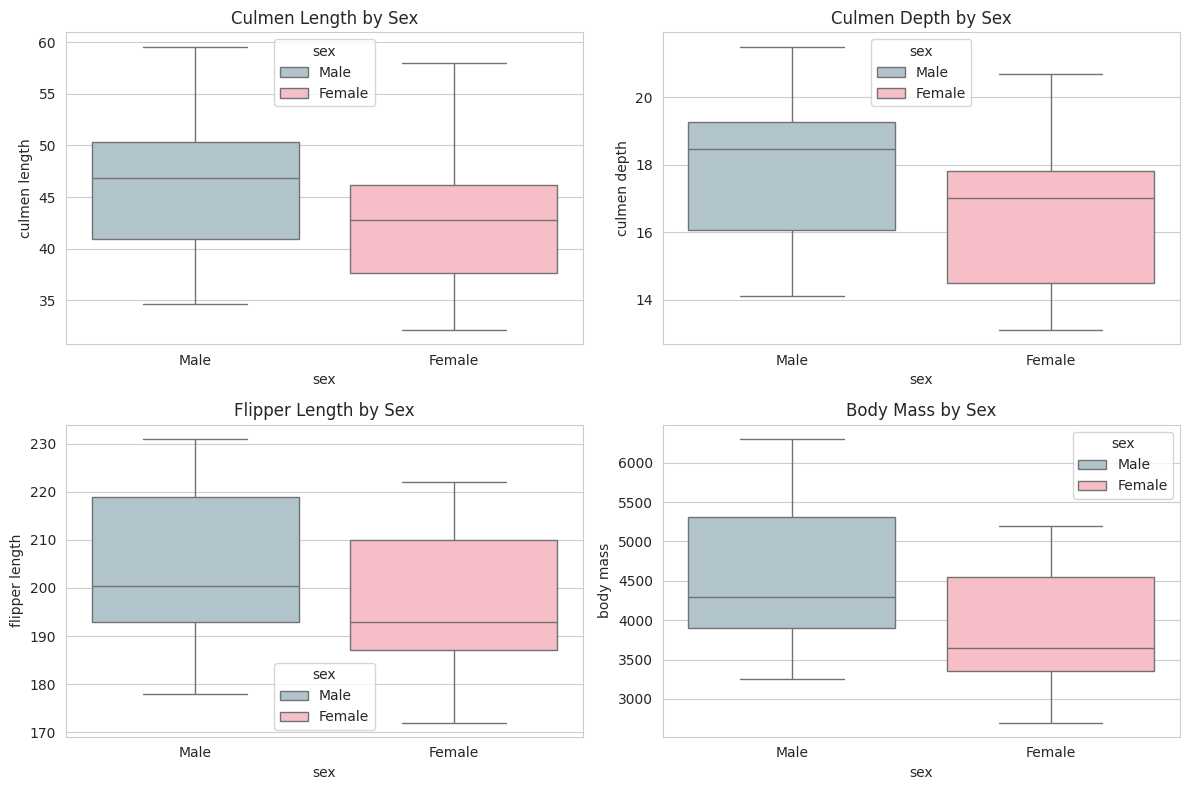

In [10]:
# --- body metrics by Gender ---

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df.to_pandas(), x="sex", y="culmen length",hue = 'sex', palette=sex_palette, ax=axes[0,0])
axes[0,0].set_title("Culmen Length by Sex")

sns.boxplot(data=df.to_pandas(), x="sex", y="culmen depth",hue = 'sex', palette=sex_palette,  ax=axes[0,1])
axes[0,1].set_title("Culmen Depth by Sex")

sns.boxplot(data=df.to_pandas(), x="sex", y="flipper length",hue = 'sex', palette=sex_palette,  ax=axes[1,0])
axes[1,0].set_title("Flipper Length by Sex")

sns.boxplot(data=df.to_pandas(), x="sex", y="body mass",hue = 'sex', palette=sex_palette,  ax=axes[1,1])
axes[1,1].set_title("Body Mass by Sex")

plt.tight_layout()
plt.show()

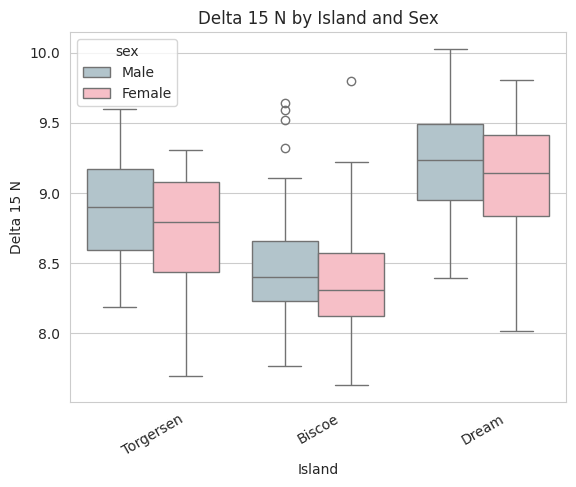

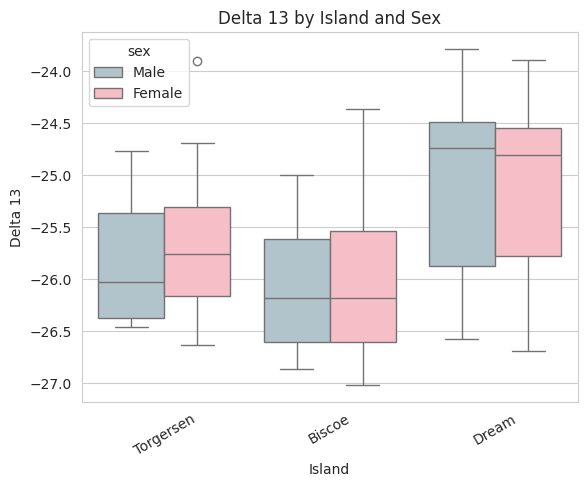

<Figure size 640x480 with 0 Axes>

In [11]:
# --- Delta 15 N by Island and Gender

sns.boxplot(data=df.to_pandas(), x="Island", y="Delta 15 N", hue="sex", palette=sex_palette)
plt.title("Delta 15 N by Island and Sex")
plt.xticks(rotation=30)
plt.show()

sns.boxplot(data=df.to_pandas(), x="Island", y="Delta 13", hue="sex", palette=sex_palette)
plt.title("Delta 13 by Island and Sex")
plt.xticks(rotation=30)
plt.show()

plt.tight_layout()
plt.show()


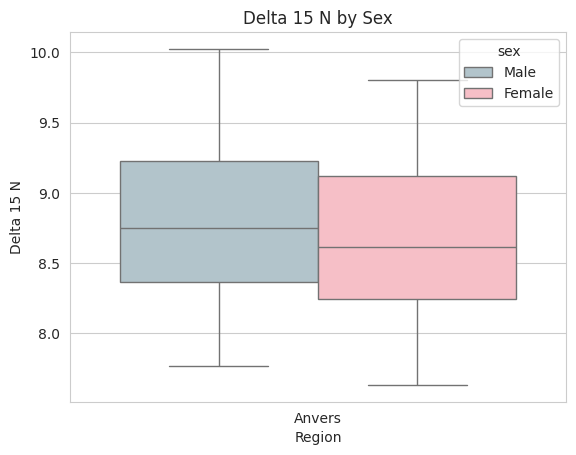

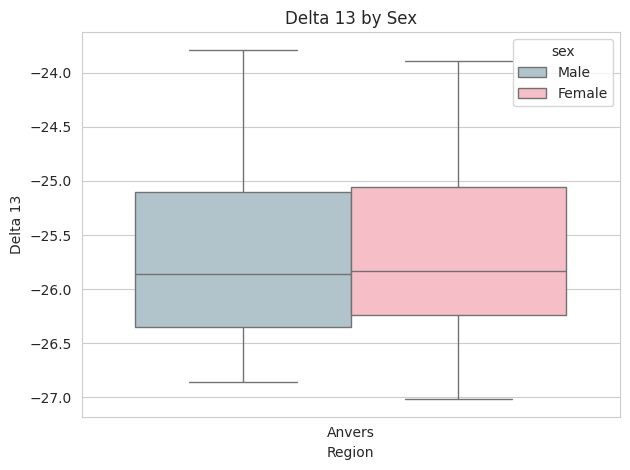

In [12]:
sns.boxplot(data=df.to_pandas(), x="Region", y="Delta 15 N", hue="sex", palette=sex_palette)
plt.title("Delta 15 N by Sex")
plt.show()

sns.boxplot(data=df.to_pandas(), x="Region", y="Delta 13", hue="sex", palette=sex_palette)
plt.title("Delta 13 by Sex")

plt.tight_layout()
plt.show()